In [4]:
#!/usr/bin/env python3
# What: this python script was generated manually by Steven Elmlinger in February 2019

# Why: Convert all ELAN (.eaf) files in a directory to csv files

#
#
# step 1: load packages
#
#

import glob     # Import glob to easily loop over files
import pympi    # Import pympi to work with elan files
import os
import pprint as pp
import pandas as pd
import numpy as np

#
#
# step 2: load data
#
#

# subject list

'''
Enter in all of the subject IDs into the variable below, comma separated like the commented out example below.
'''

subjectarray = np.array([1, 10, 18, 21, 22, 23, 24, 25, 28, 31, 35, 37, 38, 39, 41, 43, 44, 
                         52, 57, 59, 60, 61, 64, 65, 66, 70, 164, 188, 199, 291, 324, 329, 347, 351, 
                         397, 419, 443, 468, 478, 1001, 1002, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 
                         1011, 1012, 1013, 1014, 1015, 1017, 1018, 1019, 1020])


# Define variables
corpus_root = 'eaf' # this is the folder name containing all eaf files
ort_tier_names = ['Caregiver voc', 'Infant voc'] # this is the tier name, do one tier at a time, and then append
directory = os.fsencode('{}/eaf/'.format(corpus_root))

#
#
# step 3: Initialize aggregator
#
#

columns = ['sub', 'onset', 'offset', 'cat', 'tier']
output = pd.DataFrame(columns=columns)
reli_output = pd.DataFrame(columns=columns)



for a in range(len(subjectarray)):
    sub = subjectarray[a]
#     print(sub)
    flag = -1
    # Loop over all elan files the corpusroot subdirectory called eaf
    for file_path in glob.glob('{}/*.eaf'.format(corpus_root)):
        # Initialize the elan file
        flag = flag+1
        filename = os.path.basename(file_path)  #os.listdir(directory)[flag
        if filename == '.DS_Store':
            os.remove(file_path)  #os.path.join(directory.decode('utf-8'), filename.decode('utf-8')))
            break
        file = os.fsdecode(filename)
        print(file)

           
        if (file == "S%d.eaf" % sub):
            eafob = pympi.Elan.Eaf(file_path)
            # Loop over all the defined tiers that contain orthography
            for ort_tier in ort_tier_names:
                # If the tier is not present in the elan file spew an error and
                # continue. This is done to avoid possible KeyErrors
                # If the tier is present we can loop through the annotation data
                counter = -1
                all_utt = pd.DataFrame(columns=columns)
                for annotation in eafob.get_annotation_data_for_tier(ort_tier):
                    # We are only interested in the utterance
                    counter = counter+1
                    all_utt.loc[counter, 'sub'] = sub
                    all_utt.loc[counter, 'onset'] = annotation[0]/1000
                    all_utt.loc[counter, 'offset'] = annotation[1]/1000
                    all_utt.loc[counter, 'cat'] = annotation[2]
                    all_utt.loc[counter, 'tier'] = ort_tier
                output = output._append(all_utt)
#                 print(output)
            output = output.sort_values(['sub','onset'], ascending = [True,True])
#             output = output.sort_values(['reli'], ascending = [True,True])
    
        elif file == "S%d_reli.eaf" % sub:
            pass
        
        print(output)
#
#
# step 4: output individual .csv files
#
#

output.to_csv('tt_ab.csv',index = False, header = True)


S43.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S57.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1_reli.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S41.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S329.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S57_reli.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S44.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S52.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1001_reli.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S199.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S18_reli.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1012.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1006.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: [

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
175  18  576.473  577.939                       di che colore è questo? (QE)   
176  18  579.065    580.4                      questa di che colore è? ( - )   
177  18  582.285  583.287                            di che colore è?\t( - )   
178  18  584.856   586.26                         non rispondi a mamma? (QA)   
25   18  665.843  667.242                                                      

              tier  
0    Caregiver voc

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
142  23  657.211   658.75                                    eh ancora\t(CW)   
186  23  658.785  660.511                              sì sì va bene dai (C)   
143  23   659.92  660.311                                                xxx   
187  23  676.745  677.943                             che matta sei, (AL RO)   
188  23  678.599  679.203                                       lo sai? (QO)   

              tier  
0    Caregiver voc

    sub   onset  offset                                                cat  \
0     1   0.783   1.696                               questi piattini (RE)   
1     1   1.696   2.601                              mescoli la pappa (DA)   
2     1   2.603   4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1   4.715   5.092                                             sì (C)   
3     1   5.697    6.31                                          così. (C)   
..   ..     ...     ...                                                ...   
48   28  636.39  637.34                                                ino   
149  28   637.7  638.88                                   del cagnolino sì   
150  28  639.34  642.26                   e questo xxx, cos'è questo? (QE)   
49   28  642.39  643.42                                                ore   
151  28  643.47  646.92      il trattore questo e di che colore è? (RE QE)   

              tier  
0    Caregiver voc  
1    Caregiver voc  


    sub   onset  offset                                                cat  \
0     1   0.783   1.696                               questi piattini (RE)   
1     1   1.696   2.601                              mescoli la pappa (DA)   
2     1   2.603   4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1   4.715   5.092                                             sì (C)   
3     1   5.697    6.31                                          così. (C)   
..   ..     ...     ...                                                ...   
97   37  567.21  568.53                          pure questo devi dà? (QA)   
98   37  583.13  588.58  dalle da mangia(re) che ha fame sennò piange l...   
99   37   589.1  593.43       da mangiare col cucchiai(no) la pappina (RE)   
50   37  595.53  595.76                                                 eh   
100  37  597.48  597.67                                             mm (C)   

              tier  
0    Caregiver voc  
1    Caregiver voc  


    sub   onset  offset                                                cat  \
0     1   0.783   1.696                               questi piattini (RE)   
1     1   1.696   2.601                              mescoli la pappa (DA)   
2     1   2.603   4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1   4.715   5.092                                             sì (C)   
3     1   5.697    6.31                                          così. (C)   
..   ..     ...     ...                                                ...   
176  41  585.73   587.3                               mettiamo questo. (W)   
177  41  588.14  590.59                          così. e una coperta. (RE)   
178  41  590.85   591.9                          e dopo cosa si dice? (QA)   
11   41  592.93  593.67                                                xxx   
179  41   594.7  598.18  le dai la pappa con il cucchiaino alla tata ch...   

              tier  
0    Caregiver voc  
1    Caregiver voc  


    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
60   52  612.807  614.864                                                xxx   
124  52  614.529  618.197  dove è andato? Hai male alla pancia vero?\t(QO C)   
61   52  627.307  628.314                                                xxx   
125  52  629.207  630.702            Joele vieni con mamma, vieni\t(NC DA C)   
62   52  630.657   632.15                                                xxx   

              tier  
0    Caregiver voc

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
189  60  626.753  630.264  guarda dove c’ho il piattino, guarda dove c’ho...   
48   60  630.593  631.038                                                xxx   
190  60  631.037  632.441                      sopra la testa guardami (DA)    
191  60  632.445  636.049  guardami sui capelli, ohi dove ce li ho i cape...   
192  60  636.755  640.264  guarda un po’ i capelli di mamma, Lorenzo (DA ...   

              tier  
0    Caregiver voc

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
38   65  634.867  635.238                                      vo(g)lio (CW)   
39   65  635.521  635.942                                            la (CW)   
40   65  636.644  637.203                                         gioco (CW)   
140  65  637.408  639.208                                  vo(g)lio la gioco   
141  65  640.096  642.841                                                xxx   

              tier  
0    Caregiver voc

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..  ...      ...      ...                                                ...   
91  164   595.93  596.921                                                xxx   
92  164  600.739  601.534                           niente?\t\t\t\t\t\t\t(O)   
93  164   619.23  626.468  basta adesso col drago vieni qua un pochino da...   
94  164  627.649  628.833                                       Matteo? (NC)   
95  164  634.813  638.438  facciamo così questo lo prendiamo dopo e non a...   

             tier  
0   Caregiver voc  

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..  ...      ...      ...                                                ...   
54  291  247.342  250.896     stanca. così vuol dire che sei stanco. (RE QO)   
55  291  252.633  252.979                                            mm? (C)   
35  291  253.797  254.342                                       andiamo (CW)   
36  291  255.482  256.566                                mi scappa pipì (CW)   
56  291  256.757  259.728  dobbiamo vedere io non so dove sia. vieni che ...   

             tier  
0   Caregiver voc  

     sub    onset   offset                                                cat  \
0      1    0.783    1.696                               questi piattini (RE)   
1      1    1.696    2.601                              mescoli la pappa (DA)   
2      1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0      1    4.715    5.092                                             sì (C)   
3      1    5.697     6.31                                          così. (C)   
..   ...      ...      ...                                                ...   
118  347  624.848  626.126                hai mangiato tutto.\t\t\t\t\t\t(RA)   
119  347  628.142  631.136  xxx la mia pappa gliela diamo al tato?\t\t\t\t(W)   
40   347   631.25  632.585                     diamo al tato.\t\t\t\t\t\t(CW)   
120  347  632.693  636.767  al tato gliela diamo? mangia am. am.\t\t\t\t\t...   
41   347  637.696  638.018                                         am. (CWOP)   

              tier  
0    C

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



S43.eaf
      sub    onset   offset  \
0       1    0.783    1.696   
1       1    1.696    2.601   
2       1    2.603    4.607   
0       1    4.715    5.092   
3       1    5.697     6.31   
..    ...      ...      ...   
200  1006  595.307  596.773   
201  1006  598.304  599.943   
202  1006  600.259  601.655   
73   1006  603.102  603.584   
203  1006  603.912  606.001   

                                                   cat           tier  
0                                 questi piattini (RE)  Caregiver voc  
1                                mescoli la pappa (DA)  Caregiver voc  
2    e gliene dai un pochino alla bambolina forse? ...  Caregiver voc  
0                                               sì (C)     Infant voc  
3                                            così. (C)  Caregiver voc  
..                                                 ...            ...  
200             Dove c’ha il pannolino la bimba?\t(QE)  Caregiver voc  
201              Dove ce l’ha il pannolino 

      sub    onset   offset  \
0       1    0.783    1.696   
1       1    1.696    2.601   
2       1    2.603    4.607   
0       1    4.715    5.092   
3       1    5.697     6.31   
..    ...      ...      ...   
205  1009  597.791  598.327   
59   1009  607.909  609.113   
206  1009  609.227  610.089   
207  1009  616.317  619.881   
208  1009  620.967  621.489   

                                                   cat           tier  
0                                 questi piattini (RE)  Caregiver voc  
1                                mescoli la pappa (DA)  Caregiver voc  
2    e gliene dai un pochino alla bambolina forse? ...  Caregiver voc  
0                                               sì (C)     Infant voc  
3                                            così. (C)  Caregiver voc  
..                                                 ...            ...  
205                                        Cinzia (NC)  Caregiver voc  
59                                           mama (

      sub   onset  offset                                                cat  \
0       1   0.783   1.696                               questi piattini (RE)   
1       1   1.696   2.601                              mescoli la pappa (DA)   
2       1   2.603   4.607  e gliene dai un pochino alla bambolina forse? ...   
0       1   4.715   5.092                                             sì (C)   
3       1   5.697    6.31                                          così. (C)   
..    ...     ...     ...                                                ...   
44   1012  566.23  566.85                                       boc(c)a (CW)   
179  1012  566.97  569.02                            bravo e queste? (AE QE)   
45   1012  570.02  570.56                                                 ua   
180  1012  570.95   572.5              La bua? Dove ce l'hai la bua? (QE QO)   
46   1012  572.57  573.37                                                 ra   

              tier  
0    Caregiver voc

     sub    onset   offset                                                cat  \
0      1    0.783    1.696                               questi piattini (RE)   
1      1    1.696    2.601                              mescoli la pappa (DA)   
2      1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0      1    4.715    5.092                                             sì (C)   
3      1    5.697     6.31                                          così. (C)   
..   ...      ...      ...                                                ...   
39  1015  557.212  559.106                                           Prendila   
40  1015  560.489  564.383                                                xxx   
41  1015  566.531  572.978                                                xxx   
42  1015  575.212  582.425              Prendi la palla Palla prendila (DA C)   
43  1015  587.297  591.468                                                xxx   

             tier  
0   Car

      sub    onset   offset  \
0       1    0.783    1.696   
1       1    1.696    2.601   
2       1    2.603    4.607   
0       1    4.715    5.092   
3       1    5.697     6.31   
..    ...      ...      ...   
139  1019  572.513  576.777   
140  1019  583.263   585.18   
141  1019  585.972  586.861   
142  1019  587.388  588.416   
143  1019  594.888  595.597   

                                                   cat           tier  
0                                 questi piattini (RE)  Caregiver voc  
1                                mescoli la pappa (DA)  Caregiver voc  
2    e gliene dai un pochino alla bambolina forse? ...  Caregiver voc  
0                                               sì (C)     Infant voc  
3                                            così. (C)  Caregiver voc  
..                                                 ...            ...  
139  Metti il caffè Fede mettiamo Allora mamma si m...  Caregiver voc  
140            Uhh ah come è buono questo caffè (C 

In [14]:
# RELIABILITY CODING CSV

#
#
# step 1: load packages
#
#

import glob     # Import glob to easily loop over files
import pympi    # Import pympi to work with elan files
import os
import pprint as pp
import pandas as pd
import numpy as np

#
#
# step 2: load data
#
#

# subject list

'''
Enter in all of the subject IDs into the variable below, comma separated like the commented out example below.
'''

subjectarray = np.array([1, 10, 18, 52, 57, 59, 164, 1001, 1004])


# Define variables
corpus_root = 'eaf' # this is the folder name containing all eaf files
ort_tier_names = ['Caregiver voc', 'Infant voc'] # this is the tier name, do one tier at a time, and then append
directory = os.fsencode('{}/eaf/'.format(corpus_root))

#
#
# step 3: Initialize aggregator
#
#

columns = ['sub', 'onset', 'offset', 'cat', 'tier','reli']
output = pd.DataFrame(columns=columns)
reli_output = pd.DataFrame(columns=columns)



for a in range(len(subjectarray)):
    sub = subjectarray[a]
#     print(sub)
    flag = -1
    # Loop over all elan files the corpusroot subdirectory called eaf
    for file_path in glob.glob('{}/*.eaf'.format(corpus_root)):
        # Initialize the elan file
        flag = flag+1
        filename = os.path.basename(file_path)  #os.listdir(directory)[flag
        if filename == '.DS_Store':
            os.remove(file_path)  #os.path.join(directory.decode('utf-8'), filename.decode('utf-8')))
            break
        file = os.fsdecode(filename)
        print(file)

           
        if (file == "S%d.eaf" % sub) or (file == "S%d_reli.eaf" % sub):
            reli = 'original'
            if file == "S%d_reli.eaf" % sub:
                reli = 'reli'
            eafob = pympi.Elan.Eaf(file_path)
            # Loop over all the defined tiers that contain orthography
            for ort_tier in ort_tier_names:
                # If the tier is not present in the elan file spew an error and
                # continue. This is done to avoid possible KeyErrors
                # If the tier is present we can loop through the annotation data
                counter = -1
                all_utt = pd.DataFrame(columns=columns)
                for annotation in eafob.get_annotation_data_for_tier(ort_tier):
                    # We are only interested in the utterance
                    counter = counter+1
                    all_utt.loc[counter, 'sub'] = sub
                    all_utt.loc[counter, 'onset'] = annotation[0]/1000
                    all_utt.loc[counter, 'offset'] = annotation[1]/1000
                    all_utt.loc[counter, 'cat'] = annotation[2]
                    all_utt.loc[counter, 'tier'] = ort_tier
                    all_utt.loc[counter, 'reli'] = reli
                output = output._append(all_utt)
#                 print(output)
            output = output.sort_values(['sub','onset'], ascending = [True,True])
#             output = output.sort_values(['reli'], ascending = [True,True])
    
            
        print(output)
#
#
# step 4: output individual .csv files
#
#

output.to_csv('tt_ab_reli.csv',index = False, header = True)


S43.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier, reli]
Index: []
S57.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier, reli]
Index: []
S1_reli.eaf
    sub    onset   offset                                                cat  \
0     1    0.799    1.716                              questi piattini. (RE)   
1     1    1.718    2.679                             mescoli la pappa. (DA)   
2     1    2.686    4.647  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.881     5.05                                           sì. (CW)   
3     1    5.822    6.263                                          così. (C)   
..   ..      ...      ...                                                ...   
182   1   588.91  589.958                                                xxx   
171   1  590.042  590.541                                           il? (QE)   
183   1  591.097  591.989                                              teno.   
172   1  592.154  594.055 

S43.eaf
    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
0     1    0.799    1.716                              questi piattini. (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
1     1    1.718    2.679                             mescoli la pappa. (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
..   ..      ...      ...                                                ...   
173   1  595.371  600.473  adesso guarda bene. chiudi gli occhi. girati d...   
218   1  596.307  597.411                              chiudi gli occhi (DA)   
219   1  597.424  598.209                              girati di lato.\t(DA)   
220   1  598.212  599.048                               non devi vedere (DA)   
221   1  599.446  600.395                                      ferma lì (DA)   

              tier      reli  


    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
0     1    0.799    1.716                              questi piattini. (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
1     1    1.718    2.679                             mescoli la pappa. (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
..   ..      ...      ...                                                ...   
50   18  747.483   747.92                                                xxx   
210  18  748.349  761.428                                                xxx   
211  18  763.234  764.405                                                xxx   
51   18  766.778  767.841                                                xxx   
212  18   768.86  770.139                                                xxx   

              tier      reli  
0    Car

S43.eaf
   sub    onset   offset                                                cat  \
0    1    0.783    1.696                               questi piattini (RE)   
0    1    0.799    1.716                              questi piattini. (RE)   
1    1    1.696    2.601                              mescoli la pappa (DA)   
1    1    1.718    2.679                             mescoli la pappa. (DA)   
2    1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
..  ..      ...      ...                                                ...   
84  57  579.508  587.785                così così via, pronti via ah (C AR)   
85  57  580.802   584.23                                  così così via (C)   
86  57  585.909  587.816                                 pronti via ah (AR)   
20  57   589.12  592.734                                                xxx   
11  57   589.49   594.97                                            lamenti   

             tier      reli  
0   Caregiver

      sub    onset   offset  \
0       1    0.783    1.696   
0       1    0.799    1.716   
1       1    1.696    2.601   
1       1    1.718    2.679   
2       1    2.603    4.607   
..    ...      ...      ...   
159  1001  651.552  652.515   
32   1001  652.458  653.106   
35   1001  652.536   652.97   
149  1001  653.541  654.483   
160  1001  653.717  654.347   

                                                   cat           tier  \
0                                 questi piattini (RE)  Caregiver voc   
0                                questi piattini. (RE)  Caregiver voc   
1                                mescoli la pappa (DA)  Caregiver voc   
1                               mescoli la pappa. (DA)  Caregiver voc   
2    e gliene dai un pochino alla bambolina forse? ...  Caregiver voc   
..                                                 ...            ...   
159                                 Butta a mamma (DA)  Caregiver voc   
32                                         

In [5]:
data = pd.read_csv('tt_ab.csv')
data.head(10)
print(data)

        sub    onset   offset  \
0         1    0.783    1.696   
1         1    1.696    2.601   
2         1    2.603    4.607   
3         1    4.715    5.092   
4         1    5.697    6.310   
...     ...      ...      ...   
11990  1020  653.831  656.410   
11991  1020  656.449  658.045   
11992  1020  658.066  658.987   
11993  1020  659.845  660.320   
11994  1020  660.543  661.164   

                                                     cat           tier  
0                                   questi piattini (RE)  Caregiver voc  
1                                  mescoli la pappa (DA)  Caregiver voc  
2      e gliene dai un pochino alla bambolina forse? ...  Caregiver voc  
3                                                 sì (C)     Infant voc  
4                                              così. (C)  Caregiver voc  
...                                                  ...            ...  
11990                       Allora diciamo Rosaria (C W)  Caregiver voc  
11991      

In [6]:
data['group'] = ''
data.loc[(data['sub'] < 50), 'group'] = 'TD'
data.loc[(data['sub'] > 50)&(data['sub'] < 1000), 'group'] = 'ASD'
data.loc[(data['sub'] > 1000), 'group'] = 'DS'

data.index = data.index + 1

data['latency']=''
data['latency group']=''
for i in data.index:
    if i<data.index.max():
        before, new = data._get_value(i,'offset'), data._get_value(i+1,'onset')
        oldtier, newtier = data._get_value(i,'tier'), data._get_value(i+1,'tier')
        data._set_value(i+1,'latency',new-before)
        oldsub, newsub = data._get_value(i,'sub'), data._get_value(i+1,'sub')
    
            
        if oldtier=='Caregiver voc' and newtier=='Caregiver voc':
            data._set_value(i+1,'latency group','cg-cg')
        elif oldtier=='Infant voc' and newtier=='Infant voc':
            data._set_value(i+1,'latency group','inf-inf')
        elif oldtier=='Caregiver voc' and newtier=='Infant voc':
            data._set_value(i+1,'latency group','cg-inf')
        elif oldtier=='Infant voc' and newtier=='Caregiver voc':
            data._set_value(i+1,'latency group','inf-cg')
            
        if oldsub!=newsub:
            data._set_value(i+1,'latency','NaN')
            data._set_value(i+1,'latency group','NaN')
    else:
        break

data['latency_milli'] = data['latency']*1000
data.to_csv('tt_milli.csv', index = True, header = True)


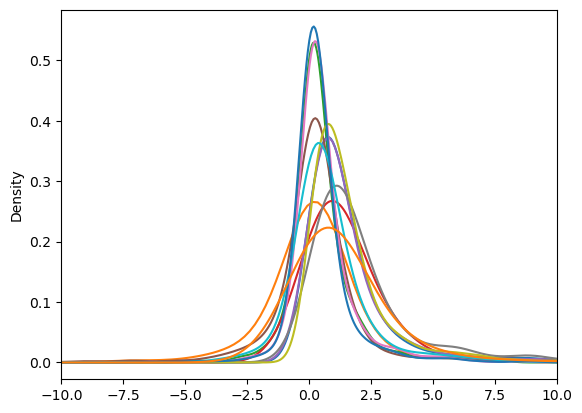

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

data['latency'] = pd.to_numeric(data['latency'],errors='coerce')
datanew = data.dropna()
# test = datanew['latency'].plot(kind='kde')
dataplot = datanew.groupby(['group','latency group'])['latency']
dataplot.plot(kind='kde')
plt.xlim([-10,10])
plt.show()


(0.0, 100.0)

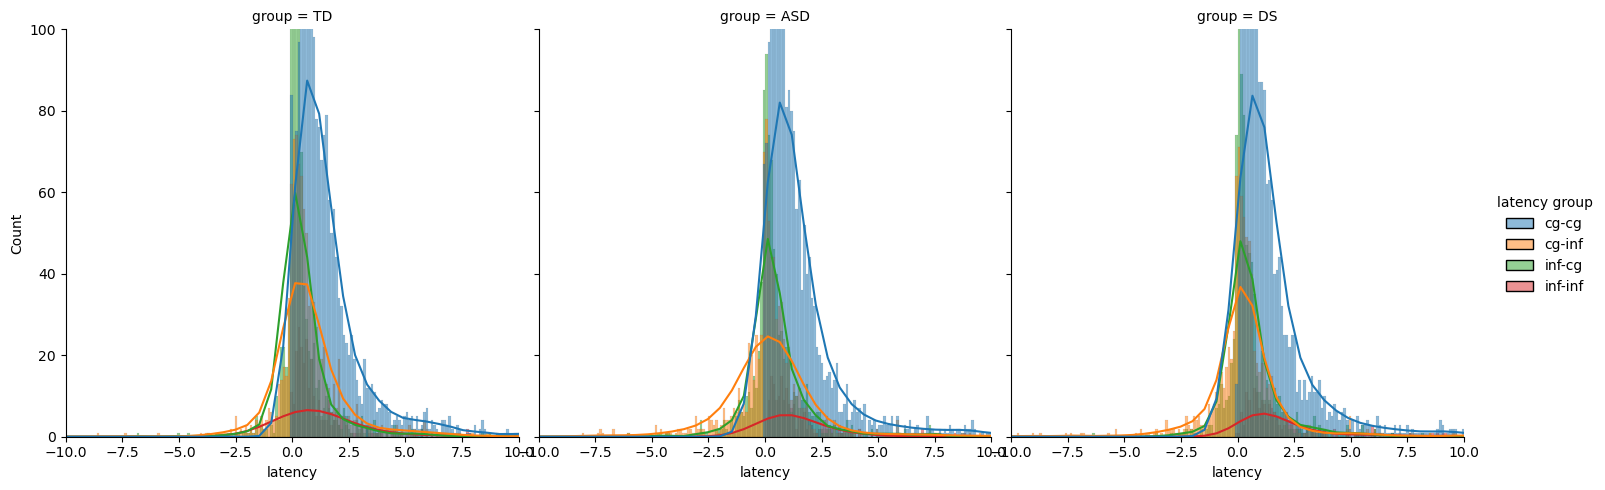

In [8]:
sns.displot(data=datanew, x='latency', kde=True, col='group', hue='latency group')
plt.xlim(-10,10)
plt.ylim(0,100)

(0.0, 3.0)

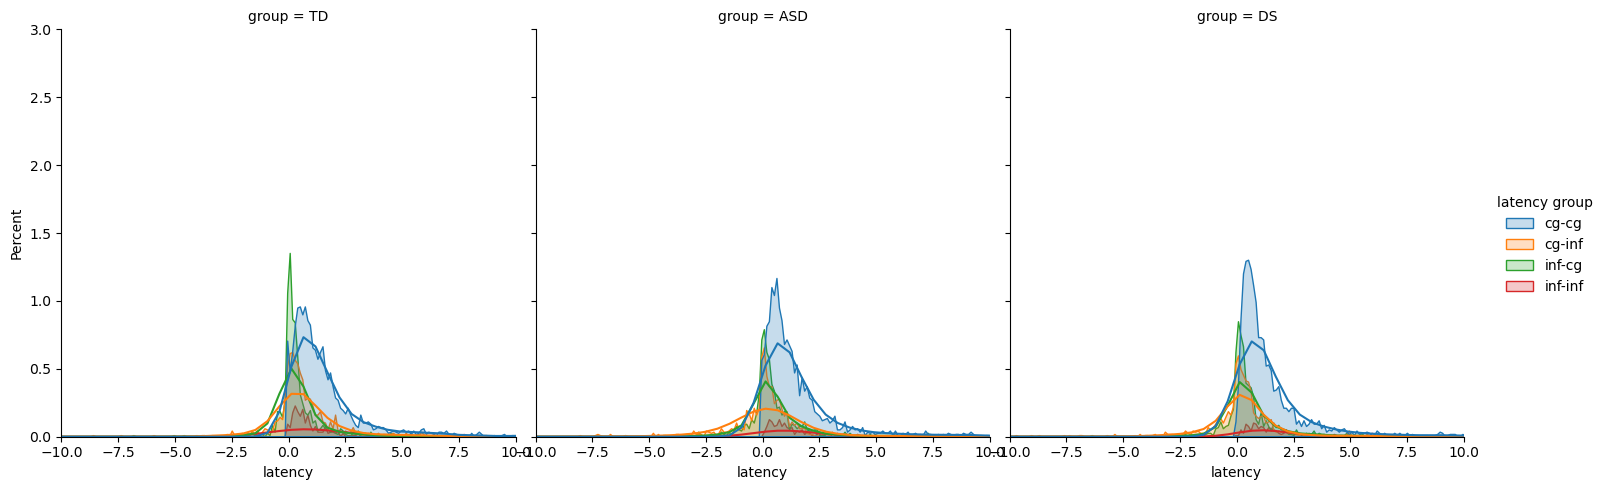

In [9]:
sns.displot(data=datanew, x='latency', kind="hist", stat="percent", element="poly", kde=True, col='group', hue='latency group')
plt.xlim(-10,10)
plt.ylim(0,3)

(0.0, 3.0)

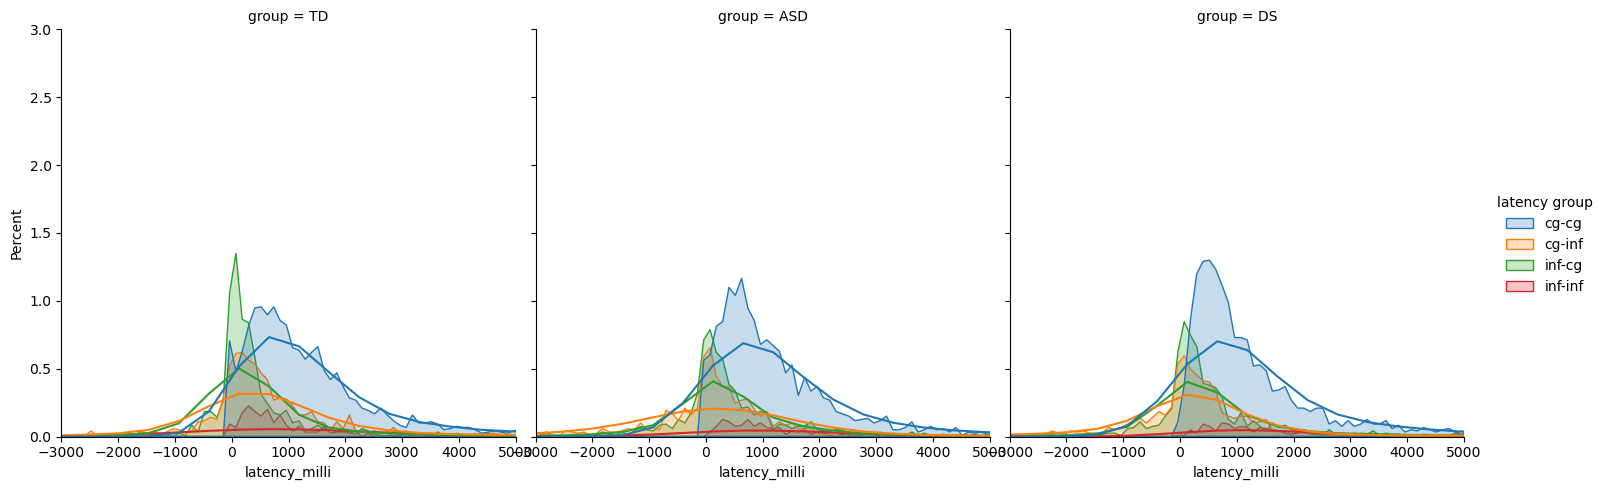

In [10]:
sns.displot(data=datanew, x='latency_milli', kind="hist", stat="percent", element="poly", kde=True, col='group', hue='latency group')
plt.xlim(-3000,5000)
plt.xticks([-3000,-2000,-1000,0,1000,2000,3000,4000,5000])
plt.ylim(0,3)

(0.0, 100.0)

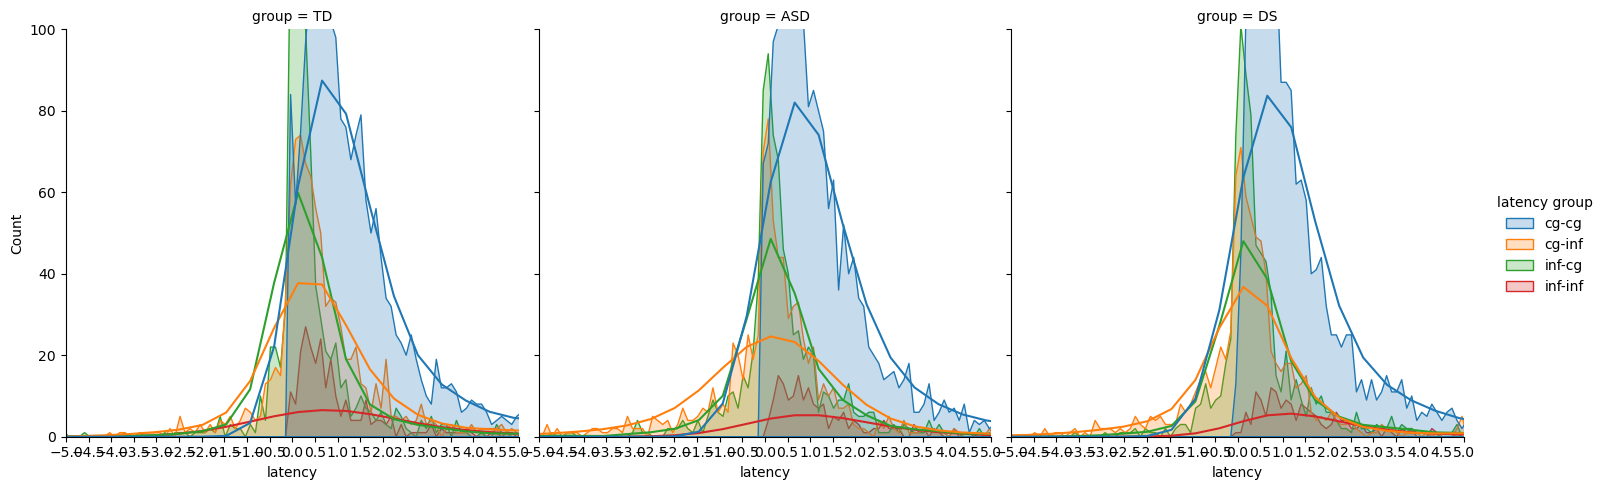

In [11]:
sns.displot(data=datanew, x='latency', kind='hist', element = 'poly', kde=True, col='group', hue='latency group')
plt.xlim(-5,5)
plt.xticks([-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.ylim(0,100)

(0.0, 130.0)

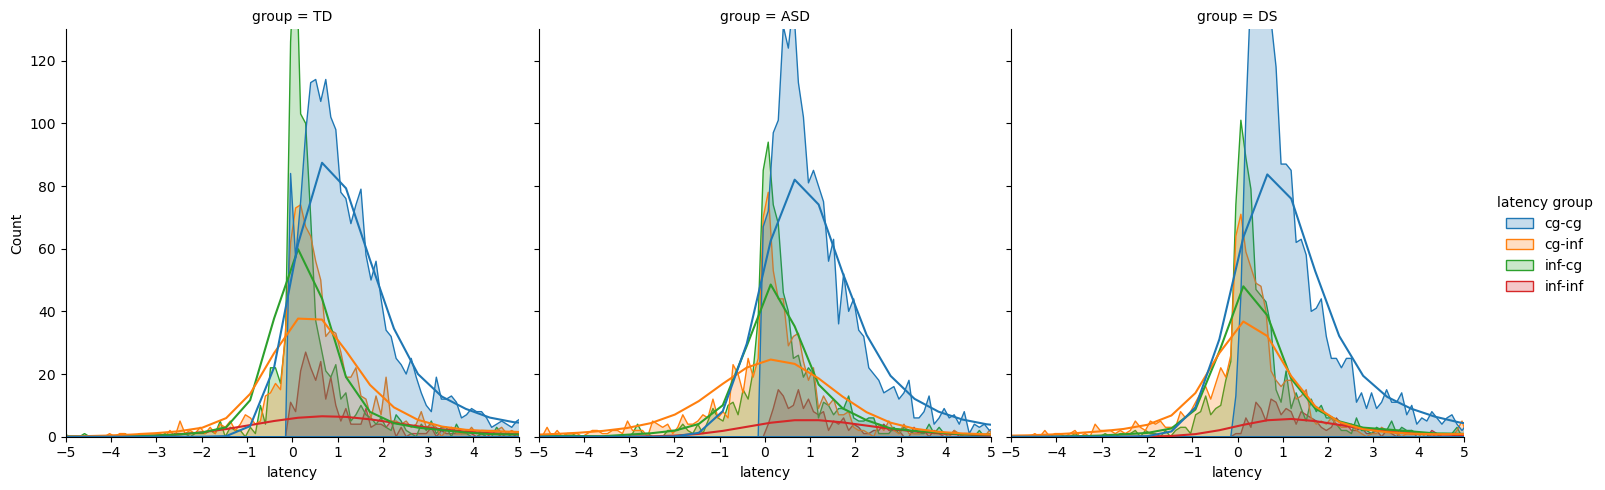

In [12]:
sns.displot(data=datanew, x='latency', kind='hist', element = 'poly', kde=True, col='group', hue='latency group')
plt.xlim(-5,5)
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.ylim(0,130)

(0.0, 130.0)

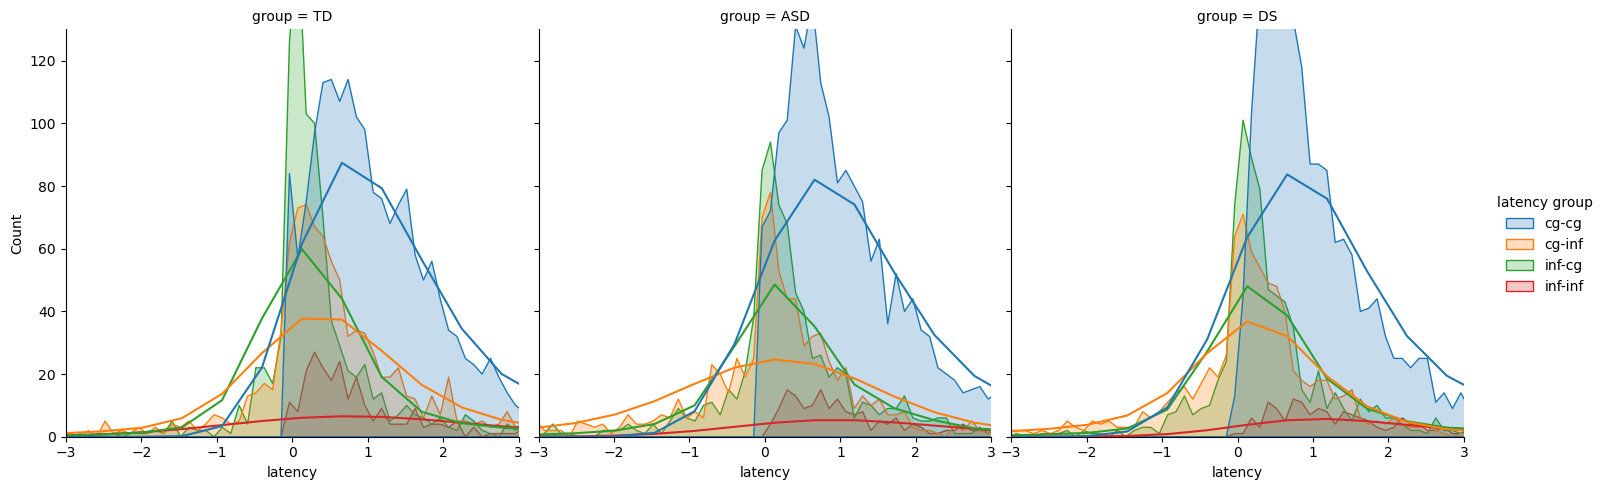

In [13]:
sns.displot(data=datanew, x='latency', kind='hist', element = 'poly', kde=True, col='group', hue='latency group')
plt.xlim(-3,3)
plt.xticks([-3,-2,-1,0,1,2,3])
plt.ylim(0,130)